# Entremamiento del modelo

In [1]:
import numpy as np
import pandas as pd
import json
import sys

# Añadir el directorio raíz al path para poder importar módulos personalizados
sys.path.append('..')

from utils import config
from utils import neural_network_functions as nnf
from utils import preprocessing_functions as pf
from utils import evaluation_functions as ef

In [2]:
# 1. Cargar los datos de entrenamiento y validación
# Cargar el dataset normalizado
train_df = pd.read_csv("../data/processed/train_set_normalized.csv")

# Separar características (X) y etiquetas (y)
X = train_df.drop('diagnosis', axis=1)  # X es DataFrame de Pandas
y = train_df['diagnosis']              # y es Serie de Pandas

# Dividir en conjunto de entrenamiento y validación
X_train, X_valid, y_train, y_valid = pf.train_test_split(X, y, test_size=0.2, random_state=config.RANDOM_STATE)

# Convertir etiquetas a formato adecuado DESPUÉS de la división
y_train = y_train.to_numpy().reshape(-1, 1) # Reshape y_train DESPUÉS de la división
y_valid = y_valid.to_numpy().reshape(-1, 1) # Reshape y_valid DESPUÉS de la división

print(f"x_train shape : {X_train.shape}")
print(f"x_valid shape : {X_valid.shape}")

# 2. Definir la arquitectura de la red neuronal
input_shape = X_train.shape[1]
output_shape = 1

network = nnf.createNetwork([
    nnf.denseLayer(input_shape, 25, activation=nnf.sigmoid, weights_initializer=nnf.he_uniform), # Pasa la función nnf.sigmoid
    nnf.denseLayer(25, 25, activation=nnf.sigmoid, weights_initializer=nnf.he_uniform), # Pasa la función nnf.sigmoid
    nnf.denseLayer(25, output_shape, activation=nnf.sigmoid, weights_initializer=nnf.he_uniform) # Pasa la función nnf.sigmoid
])

# 3. Definir hiperparámetros y parámetro de loss function
learning_rate = config.LEARNING_RATE
epochs = config.EPOCHS
batch_size = config.BATCH_SIZE
loss_function = "binary_crossentropy"

x_train shape : (365, 30)
x_valid shape : (91, 30)


Epoch 1/85, Loss (train/val): 12.8692/12.9046, Accuracy (train/val): 0.6274/0.6264
Epoch 2/85, Loss (train/val): 12.8692/12.9046, Accuracy (train/val): 0.6274/0.6264
Epoch 3/85, Loss (train/val): 12.8692/12.9046, Accuracy (train/val): 0.6274/0.6264
Epoch 4/85, Loss (train/val): 12.8692/12.9046, Accuracy (train/val): 0.6274/0.6264
Epoch 5/85, Loss (train/val): 12.8692/12.9046, Accuracy (train/val): 0.6274/0.6264
Epoch 6/85, Loss (train/val): 10.6928/11.0069, Accuracy (train/val): 0.6904/0.6813
Epoch 7/85, Loss (train/val): 3.8797/3.4159, Accuracy (train/val): 0.8877/0.9011
Epoch 8/85, Loss (train/val): 3.1227/2.2773, Accuracy (train/val): 0.9096/0.9341
Epoch 9/85, Loss (train/val): 2.9335/1.8977, Accuracy (train/val): 0.9151/0.9451
Epoch 10/85, Loss (train/val): 2.5549/1.8977, Accuracy (train/val): 0.9260/0.9451
Epoch 11/85, Loss (train/val): 1.8925/1.5182, Accuracy (train/val): 0.9452/0.9560
Epoch 12/85, Loss (train/val): 1.7033/1.5182, Accuracy (train/val): 0.9507/0.9560
Epoch 13/85, 

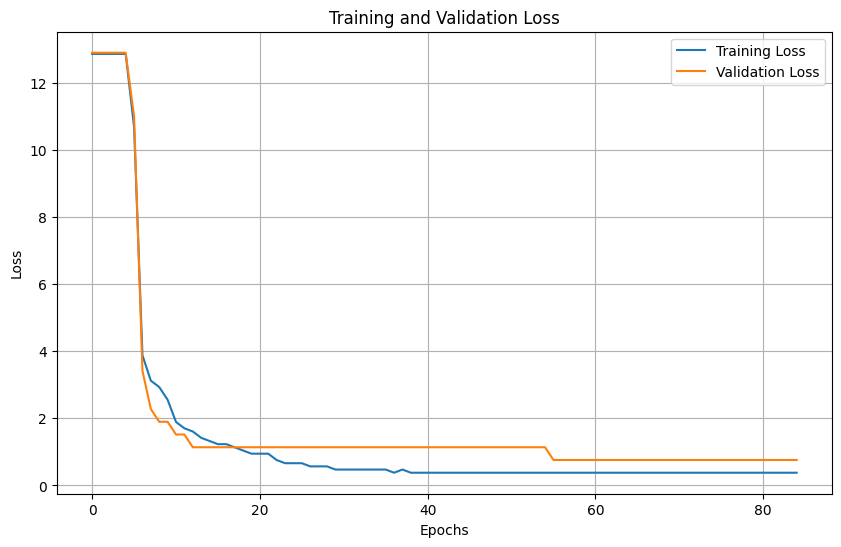

In [3]:
# 4. Entrenar el modelo
history = nnf.fit(network, X_train, y_train, X_valid, y_valid,
                    loss_function=loss_function,
                    learning_rate=learning_rate,
                    batch_size=batch_size,
                    epochs=epochs)

# 5. Guardar el modelo entrenado en formato JSON
model_filepath = "../output/models/saved_model.json" # Cambiamos la extensión a .json
nnf.save_model_json(network, model_filepath)
print(f"# saving model \"{model_filepath}\" to disk...")

# 6. Calcular Accuracy en el conjunto de validación
predictions_valid = nnf.predict(network, X_valid) # Función predict que debes implementar
accuracy_valid = ef.accuracy(y_valid, predictions_valid) # Usamos la función accuracy de evaluation_functions
print(f"Validation Accuracy: {accuracy_valid:.4f}")


# 7. Visualizar el entrenamiento (opcional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()